In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.4 MB/s 


In [2]:
import rasterio
import cv2

In [3]:
src = rasterio.open('/content/Bolivia_23014_LabelHand.tif')

In [4]:
img = src.read()

In [5]:
img.shape

(1, 512, 512)

In [6]:
import numpy as np

In [7]:
img = np.moveaxis(img,0,2)

In [8]:
w,h = 256,256

In [ ]:
img = cv2.resize(img,(w, h), interpolation = cv2.INTER_NEAREST)

In [9]:
img.shape

(512, 512, 1)

In [ ]:
# Function for resizing the test image
def img_resize(path,w,h):
  src = rasterio.open(path)
  img = src.read()
  img = np.moveaxis(img,0,2)
  img = cv2.resize(img,(w, h), interpolation = cv2.INTER_NEAREST)
  return img



In [ ]:
img = img_resize('/content/clipped_test.tif', 256,256)

In [ ]:
img.shape

(256, 256, 13)

In [10]:
y = np.expand_dims(img, axis=0)

In [11]:
y.shape

(1, 512, 512, 1)

In [19]:
image = reshape_as_image(y)

NameError: ignored

In [ ]:
##Function for resizing and reshaping the test image for AOI

def img_resize(path,w,h):
  src = rasterio.open(path)
  img = src.read()
  img = np.moveaxis(img,0,2)
  img = cv2.resize(img,(w, h), interpolation = cv2.INTER_NEAREST)
  img = scaler.fit_transform(test_img.reshape(-1, test_image.shape[-1])).reshape(test_image.shape)
  img = np.expand_dims(img, axis=0)
  return img


In [12]:
profile = src.profile

In [13]:
profile

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 512, 'height': 512, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841195857e-05, 0.0, -64.89717073370342,
       0.0, -8.983152841195857e-05, -13.568154051341253), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [23]:
with rasterio.open('output_1', 'w', **profile) as dst:
  dst.write(y.squeeze(), 1)


In [24]:
img1 = rasterio.open('/content/output_1')

In [28]:
new = img1.read(1)

In [29]:
new.shape

(512, 512)

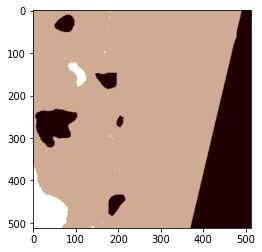

In [30]:
from matplotlib import pyplot

pyplot.imshow(new, cmap='pink')
pyplot.show()

In [ ]:
## function for writing image from test output array